### DOBRODOŠLI v programu za analizo podatkov spletne strani https://myanimelist.net/topanime.php
Edino pravilo za uporabo je pogon vsake celice.

V prvi celici sem pripravil funkcijo. Vse kar je treba storiti je pognati celico, to bi vam moralo ustvariti csv datoteko, v kateri bodo zapisani podatki. Po želji lahko tudi spremenite argument število strani, trenutno je nastavljen na 20, kar pomeni, da se bo v csv naložilo 20*50 vrstic podatkov. Pri izbiri števila strani ne pretiravati (izberite manj kot 100, saj se že za 100 strani nalaga več kot minuto, poleg tega pa lahko stran neha dovoljevati prenos ogromne količine HTML-ja), predstavitev pa je bila narejena z izbiro 20 strani, kar pomeni 1000 animejev.

In [12]:
from mojcsv import *
naredi_csv("ime_csv_datoteke.csv", stevilo_strani=20)

Sedaj lahko začnemo z analizo podatkov. S pomočjo knjižnice Pandas preberemo csv datoteko in ustvarimo razpredelnico, v kateri so prikazani ime, zvrst in število epizod, čas nastajanja, število uporabnikov in ocena animeja.

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
animeji = pd.read_csv("ime_csv_datoteke.csv")
animeji.index = animeji.index + 1 # zamaknemo, da se prvi anime začne z 1 ne z 0
animeji["ime"] = animeji["ime"].str.replace("&#039;", "'") # apostrof ima čuden html
animeji['število uporabnikov'] = animeji['število uporabnikov'].str.replace(',', '').astype(int) # število uporabnikov želimo imeti kot celo število, ne niz
animeji

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
1,Sousou no Frieren,TV (28 eps),Sep 2023 - Mar 2024,832004,9.34
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387651,9.09
3,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2594870,9.07
4,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,639453,9.06
5,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,2318558,9.05
...,...,...,...,...,...
996,Lupin the IIIrd: Jigen Daisuke no Bohyou,Movie (1 eps),Jun 2014 - Jun 2014,30043,7.80
997,Magi: Sinbad no Bouken,OVA (5 eps),May 2014 - Jul 2015,137972,7.80
998,Mahoujin Guruguru (2017),TV (24 eps),Jul 2017 - Dec 2017,33668,7.80
999,Meitantei Conan Movie 08: Ginyoku no Time Trav...,TV Special (1 eps),Apr 2004 - Apr 2004,22169,7.80


Pa si poglejmo še prvih 10 najbolje ocenjenih animejev.

In [14]:
najbolje_ocenjeni = animeji.sort_values(by="ocena", ascending=False)
najbolje_ocenjeni.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
1,Sousou no Frieren,TV (28 eps),Sep 2023 - Mar 2024,832004,9.34
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387651,9.09
3,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2594870,9.07
4,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,639453,9.06
5,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,2318558,9.05
6,Gintama: The Final,Movie (1 eps),Jan 2021 - Jan 2021,154609,9.04
8,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,2879388,9.03
7,Gintama',TV (51 eps),Apr 2011 - Mar 2012,563970,9.03
9,Ginga Eiyuu Densetsu,OVA (110 eps),Jan 1988 - Mar 1997,327180,9.02
10,Gintama': Enchousen,TV (13 eps),Oct 2012 - Mar 2013,329407,9.02


In še prvih 10 najpopularnejših animejev.

In [15]:
najpopularnejši_animeji = animeji.sort_values(by="število uporabnikov", ascending=False)
najpopularnejši_animeji.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
110,Shingeki no Kyojin,TV (25 eps),Apr 2013 - Sep 2013,3998676,8.55
85,Death Note,TV (37 eps),Oct 2006 - Jun 2007,3952098,8.62
2,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3387651,9.09
139,One Punch Man,TV (12 eps),Oct 2015 - Dec 2015,3260144,8.49
152,Kimetsu no Yaiba,TV (26 eps),Apr 2019 - Sep 2019,3089137,8.46
860,Boku no Hero Academia,TV (13 eps),Apr 2016 - Jun 2016,3060854,7.86
640,Naruto,TV (220 eps),Oct 2002 - Feb 2007,2886888,8.00
8,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,2879388,9.03
28,Kimi no Na wa.,Movie (1 eps),Aug 2016 - Aug 2016,2780702,8.83
123,Shingeki no Kyojin Season 2,TV (12 eps),Apr 2017 - Jun 2017,2759315,8.52


Oglejmo si še povprečno oceno animeja.

In [16]:
povprečna_ocena = animeji["ocena"].mean()
print("Povprečna ocena:", povprečna_ocena)

Povprečna ocena: 8.15996


Izračunajmo še povprečno število epizod, ki jih ima anime.

In [17]:
anime_serije = animeji[animeji["zvrst in število epizod"].str.contains("TV")]
def izlušči_epizode(podatki):
    try:
        return int(podatki.split('(')[1].split(' ')[0])
    except:
        return None

anime_serije["epizode"] = anime_serije["zvrst in število epizod"].apply(izlušči_epizode)
povprečno_št_epizod_anime_serije = anime_serije["epizode"].mean()
print("Povprečno število epizod anime serije:", round(povprečno_št_epizod_anime_serije, 2))

Povprečno število epizod anime serije: 28.81


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_14576\577650493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_serije["epizode"] = anime_serije["zvrst in število epizod"].apply(izlušči_epizode)


Poglejmo si še 10 najdaljših animejev.

In [18]:
najdaljši_animeji = animeji[animeji["zvrst in število epizod"].str.contains("TV")].copy()
najdaljši_animeji["epizode"] = najdaljši_animeji["zvrst in število epizod"].apply(izlušči_epizode)
najdaljši_animeji = najdaljši_animeji.sort_values(by="epizode", ascending=False)
najdaljši_animeji = najdaljši_animeji.drop(columns=["epizode"])
najdaljši_animeji.head(10)

,ime,zvrst in število epizod,čas nastajanja,število uporabnikov,ocena
916,Doraemon (1979),TV (1787 eps),Apr 1979 - Mar 2005,64859,7.84
305,Naruto: Shippuuden,TV (500 eps),Feb 2007 - Mar 2017,2518569,8.27
700,Bleach,TV (366 eps),Oct 2004 - Mar 2012,1995662,7.95
405,Dragon Ball Z,TV (291 eps),Apr 1989 - Jan 1996,1240275,8.18
640,Naruto,TV (220 eps),Oct 2002 - Feb 2007,2886888,8.00
475,Katekyou Hitman Reborn!,TV (203 eps),Oct 2006 - Sep 2010,561318,8.12
18,Gintama,TV (201 eps),Apr 2006 - Mar 2010,1076336,8.93
895,Tennis no Oujisama,TV (178 eps),Oct 2001 - Mar 2005,186571,7.85
457,Black Clover,TV (170 eps),Oct 2017 - Mar 2021,1697909,8.14
864,InuYasha,TV (167 eps),Oct 2000 - Sep 2004,807180,7.86


Spodaj je prikazan tudi histogram, ki pove, koliko animejev ima določeno oceno.

Text(0, 0.5, 'pogostost')

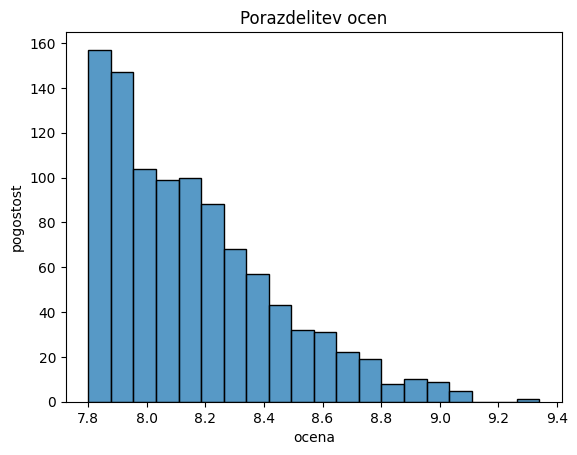

In [19]:
sns.histplot(animeji["ocena"])
plt.title("Porazdelitev ocen")
plt.ylabel("pogostost")

Postavimo hipotezo, da imajo animeji, ki so daljši, tudi višje ocene. To bi se lahko zgodilo, saj bi lahko dolžina animeja implicirala tudi njegovo kvaliteto in zato dobro oceno.

Text(0.5, 1.0, 'Epizode in ocena')

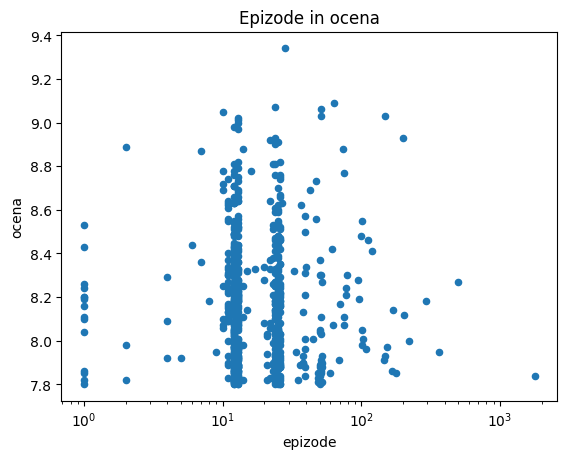

In [20]:
najdaljši_animeji = animeji[animeji["zvrst in število epizod"].str.contains("TV")].copy()
najdaljši_animeji["epizode"] = najdaljši_animeji["zvrst in število epizod"].apply(izlušči_epizode)
anime_serije.plot.scatter(x="epizode", y="ocena", logx=True)
plt.title("Epizode in ocena")

Na podlagi grafa lahko hipotezo ovržemo, kvaliteta animeja torej ni odvisna od njegove dolžine.

Pa si poglejmo, če je mogoče kvaliteta animeja v kakšni pozitivni korelaciji s številom uporabnikov (ljudi, ki so ga gledali).

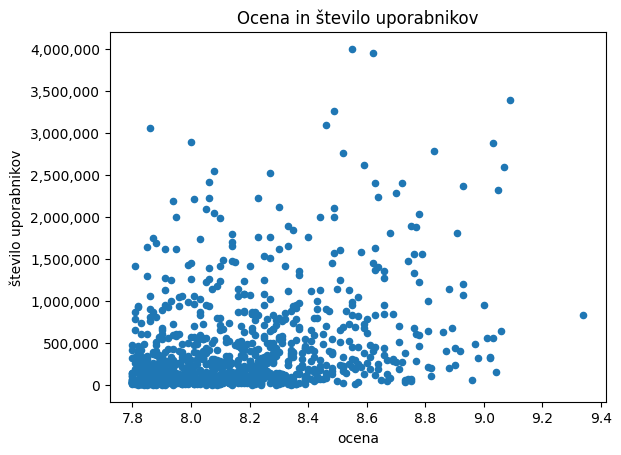

In [21]:
animeji.plot.scatter(x="ocena", y="število uporabnikov")
plt.title("Ocena in število uporabnikov")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # treba je bilo prilagoditi skalo za število uporabnikov

Tukaj tudi ni opaziti kakšne korelacije, gostost grafa na levem spodnjem delu je posledica porazdelitev ocen (glej graf "Porazdelitev ocen").

Za konec si poglejmo še graf "Porazdelitev epizod", ki predstavlja koliko animejev ima določeno število epizod.

Text(0, 0.5, 'pogostost')

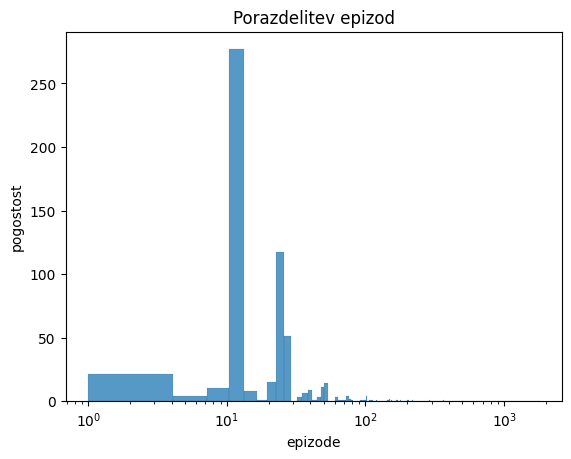

In [22]:
sns.histplot(anime_serije["epizode"])
plt.xscale("log")
plt.title("Porazdelitev epizod")
plt.ylabel("pogostost")

Vidimo, da ima največ animejev 12 epizod.